# Unsupervised Clustering of SciStarter Projects

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Projects Data

In [2]:
# Load the projects data from file
projects = pd.read_pickle("../data/raw/project_data")

In [3]:
# Inspect the projects dataframe
projects.head()

,UN_regions,country,description,error,guid,origin,regions,tags,title,topics,url,project_id
0,[],,Foldit is a revolutionary new computer game en...,NaN,5f80760d-8398-5091-b3c6-f34c39216e88,scistarter,[],"[dna, protein]",Foldit,"[Computers & Technology, Biology, Chemistry]",https://scistarter.com/project/4-Foldit-Foldit,4
1,[],,Firefly Watch combines an annual summer evenin...,NaN,c9664e0c-819a-5a42-b4bb-5f25d83a486d,scistarter,"[{'geometry': {'type': 'MultiPolygon', 'coordi...","[boston, cambridge, fireflies, insects, lightn...",Firefly Watch,"[Nature & Outdoors, Animals, Ecology & Environ...",https://scistarter.com/project/5-Firefly-Watch...,5
2,[],,Galaxy Zoo needs your help to classify galaxie...,NaN,11f65e99-b463-5e01-ac11-ae59c021dfe7,scistarter,[],"[astronomy & space, space, space science, zoon...",Galaxy Zoo,"[Astronomy & Space, Computers & Technology]",https://scistarter.com/project/6-Galaxy-Zoo-Ga...,6
3,[],None,Pay attention to the plants and animals in you...,NaN,wilsoncenter:27-107,scistarter,"[{'geometry': {'type': 'MultiPolygon', 'coordi...","[android, animal, animals, app, biology, clima...",Nature's Notebook,"[Ocean, Water, Marine & Terrestrial, Education...",https://scistarter.com/project/7-Natures-Noteb...,7
4,[],,A recent issue of Make magazine (http://makezi...,NaN,ae91e967-6eec-5aef-ab3a-7d86ceff737a,scistarter,[],[],Laser Harp: Build It Yourself,"[Computers & Technology, Sound, Physics]",https://scistarter.com/project/8-Laser-Harp-Bu...,8


In [4]:
# Get the list of unique topics
topics = list(projects['topics'])
flatten = lambda l: [item for sublist in l for item in sublist]
flattened_topics = flatten(topics)
unique_topics = list(set(flattened_topics))

print('There are ' + str(len(unique_topics)) + ' topics')
print(unique_topics)

There are 27 topics
['Animals', 'Geography', 'Social Science', 'Health & Medicine', 'Birds', 'Ocean, Water, Marine & Terrestrial', 'Science Policy', 'Climate & Weather', 'Computers & Technology', 'Insects & Pollinators', 'Agriculture', 'Events', 'Awards', 'Psychology', 'Food', 'Nature & Outdoors', 'Ecology & Environment', 'Chemistry', 'Geology & Earth Science', 'Education', 'Archeology & Cultural', 'Transportation', 'Biology', 'Sound', 'Astronomy & Space', 'Physics', 'Crowd Funding']


Since there are 27 topics, we should first attempt to cluster our projects into 27 clusters

In [5]:
# Extract the description from the projects
titles = projects['description']

### TF-IDF Vectors for Project Titles

In [6]:
# Create our TF-IDF vectors for the project descriptions vocabulary
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(titles)

### Cluster Projects

In [7]:
# Create 27 clusters based on the project descriptions
true_k = 27
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=27, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# Make predictions for each project in the dataset
predicted = model.predict(X)
projects['predicted_cluster'] = predicted

### Examine Clusters

In [9]:
clusters = projects.groupby('predicted_cluster')['topics'].agg(['size', 'sum']).reset_index()
clusters = clusters.rename(index=str, columns={"sum": "topics"})
clusters['unique_topics'] = clusters['topics'].apply(set)
clusters['topics_count'] =  clusters['unique_topics'].apply(len)
clusters

,predicted_cluster,size,topics,unique_topics,topics_count
0,0,396,"[Computers & Technology, Biology, Chemistry, A...","{Animals, Geography, Social Science, Health & ...",27
1,1,59,"[Nature & Outdoors, Animals, Ecology & Environ...","{Animals, Geography, Social Science, Health & ...",20
2,2,135,"[Computers & Technology, Nature & Outdoors, An...","{Animals, Geography, Social Science, Health & ...",27
3,3,42,"[Animals, Health & Medicine, Social Science, G...","{Animals, Geography, Social Science, Health & ...",24
4,4,30,"[Nature & Outdoors, Ecology & Environment, Ins...","{Insects & Pollinators, Animals, Computers & T...",12
5,5,75,"[Climate & Weather, Archeology & Cultural, Ani...","{Animals, Social Science, Health & Medicine, B...",24
6,6,15,"[Biology, Insects & Pollinators, Sound, Comput...","{Computers & Technology, Animals, Insects & Po...",10
7,7,30,"[Nature & Outdoors, Biology, Geology & Earth S...","{Archeology & Cultural, Computers & Technology...",17
8,8,33,"[Computers & Technology, Physics, Biology, Hea...","{Animals, Geography, Social Science, Health & ...",27
9,9,52,"[Astronomy & Space, Astronomy & Space, Compute...","{Animals, Geography, Social Science, Health & ...",23


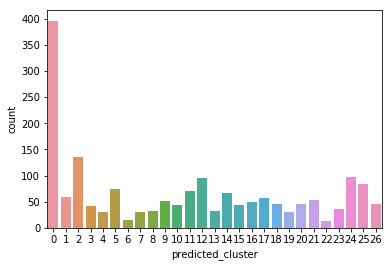

In [16]:
sns.countplot(x="predicted_cluster", data=projects)

We can see that aside from Cluster 0, we have a reasonably even spread of projects per cluster. These clusters can then be used as a basic form of recommendation